In [14]:
import os, data_new
import numpy as np
import pandas as pd

In [2]:
result_root = "E:\\Results\\Respiration\\"

meeting_number = 4
curr_result_path = os.path.join(result_root, f"MTG_{meeting_number}")

In [3]:
datatype = os.listdir(curr_result_path)
sample_type = datatype[2]
selected_path = os.path.join(curr_result_path, sample_type)
selected_data = os.listdir(selected_path)
sample_patient = selected_data[0]
patient_path = os.path.join(selected_path, sample_patient)
print(patient_path)

E:\Results\Respiration\MTG_4\Mammo\27843.xlsx


In [96]:
datatype

['HCC_trained', 'HCC_untrained', 'Mammo']

In [4]:
sample_data = pd.read_excel(patient_path)
print(list(sample_data.keys()))

['Unnamed: 0', 'LVL Mean', 'VD Mean', 'LVL STD', 'VD STD']


In [5]:
level_means = list(sample_data["LVL Mean"])
distance_means = list(sample_data["VD Mean"])
level_stds = list(sample_data["LVL STD"])
distance_stds = list(sample_data["VD STD"])

In [6]:
reproducibility = data_new.reproducibility(level_means)
stability = data_new.stability(distance_means)
print(f"Reproducibility: {reproducibility:.4f}")
print(f"Stability: {stability:.4f}")

Reproducibility: 0.4892
Stability: 0.6569


In [ ]:
print("=====Average Level(mm)=====")
print(f"Mean: {np.mean(level_means):.4f}\tSTD: {np.mean(level_stds)}\tCV: {(np.mean(level_stds)/np.mean(level_means)):.4f}")
print("=====Vertical Distance(mm)=====")
print(f"Mean: {np.mean(distance_means):.4f}\tSTD: {np.mean(distance_stds)}\tCV: {(np.mean(distance_stds)/np.mean(distance_means)):.4f}")

=====Average Level=====
Mean: 9.1527	STD: 0.07227614757329431	CV: 0.0079
=====Vertical Distance=====
Mean: 0.2904	STD: 0.1268137287306023	CV: 0.4366


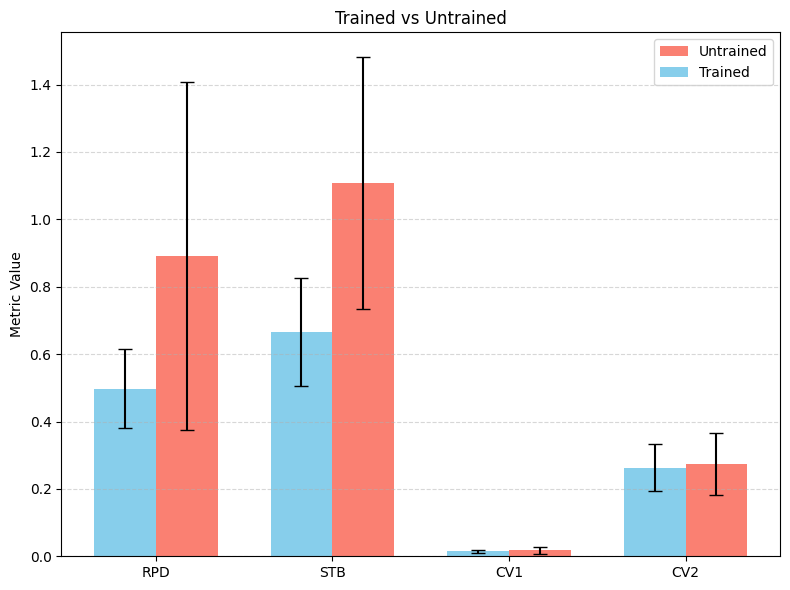

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

untrained = {
    "RPD": (0.8914, 1.0342),
    "STB": (1.1072, 0.7476),
    "CV1": (0.0173, 0.0183),
    "CV2": (0.2745, 0.1850),
}

trained = {
    "RPD": (0.4972, 0.2353),
    "STB": (0.6646, 0.3205),
    "CV1": (0.0149, 0.0080),
    "CV2": (0.2631, 0.1411),
}

metrics = ["RPD", "STB", "CV1", "CV2"]

untrained_means = [untrained[m][0] for m in metrics]
trained_means = [trained[m][0] for m in metrics]
untrained_stds = [untrained[m][1]/2 for m in metrics]
trained_stds = [trained[m][1]/2 for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x + width/2, untrained_means, width, yerr=untrained_stds, label="Untrained", color='salmon', capsize=5)
bars2 = ax.bar(x - width/2, trained_means, width, yerr=trained_stds, label="Trained", color='skyblue', capsize=5)

ax.set_ylabel("Metric Value")
ax.set_title("Trained vs Untrained")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

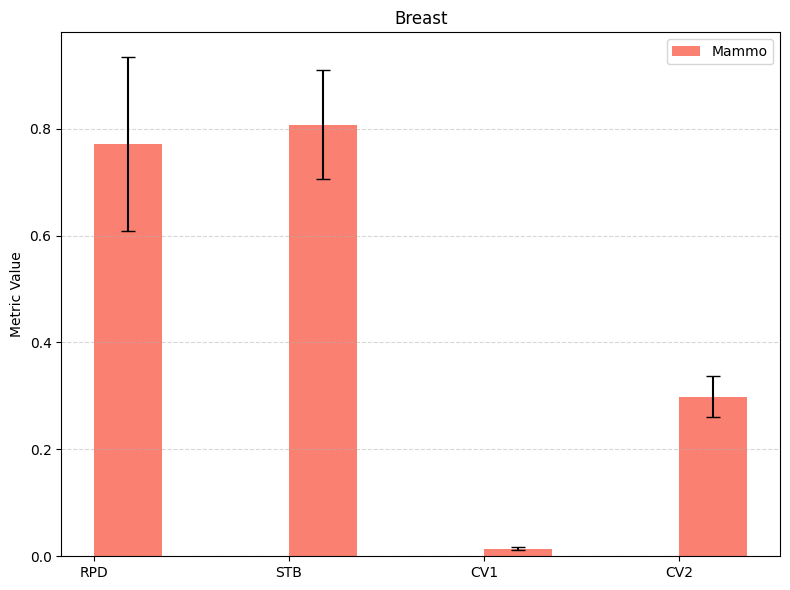

<Figure size 640x480 with 0 Axes>

In [ ]:
mammo = {
    "RPD": (0.7713, 0.3246),
    "STB": (0.8077, 0.2040),
    "CV1": (0.0145, 0.0057),
    "CV2": (0.2983, 0.0767),
}

metrics = ["RPD", "STB", "CV1", "CV2"]

mammo_means = [mammo[m][0] for m in metrics]
mammo_stds = [mammo[m][1]/2 for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x + width/2, mammo_means, width, yerr=mammo_stds, label="Mammo", color='salmon', capsize=5)

ax.set_ylabel("Metric Value")
ax.set_title("Breast")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [43]:
def plot_by_fx(patient_data, metric_type):
    df = pd.read_excel(patient_data)
    lvl_mean = df["LVL Mean"]
    vd_mean = df["VD Mean"]
    lvl_std = df["LVL STD"]
    vd_std = df["VD STD"]
    x = range(len(lvl_std))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle("Metrics over fractions")
    if metric_type == "mu":
        ax1.plot(x, lvl_mean), ax1.set_title("Average Level (Mean)")
        ax2.plot(x, vd_mean), ax2.set_title("Vertical Distance (Mean)")
    else:
        ax1.plot(x, lvl_std), ax1.set_title("Average Level (STD)")
        ax2.plot(x, vd_std), ax2.set_title("Vertical Distance (STD)")
    plt.show()
    return

In [47]:
result_root = "E:\\Results\\Respiration\\MTG_4"
organized_data_path = os.path.join(result_root, "Organized_Data")
curr_type_path = os.path.join(organized_data_path, "HCC_untrained")
data_list = os.listdir(curr_type_path)
print(data_list)

['26839_Breathhold_1.00-1.50_VMAT.xlsx', '27151_Breathhold_1.50-2.00_VMAT.xlsx', '27502_Breathhold_2.10-2.60_IMRT.xlsx', '27534V1_Breathhold_1.75-2.25_IMRT.xlsx', '27534V2_Breathhold_1.75-2.25_VMAT.xlsx', '27550_Breathhold_1.50-2.00_VMAT.xlsx', '27749_Breathhold_1.40-1.90_IMRT.xlsx', '27782_Breathhold_0.60-0.95_IMRT.xlsx', '27862_Breathhold_1.70-2.20_IMRT.xlsx', '27873V1_Vreathhold_1.20-1.70_IMRT.xlsx', '27873V2_Vreathhold_1.20-1.70_IMRT.xlsx', '27873V3_Vreathhold_1.20-1.70_IMRT.xlsx', '27873V4_Vreathhold_1.20-1.70_IMRT.xlsx', '27914_Breathhold_2.20-2.70_VMAT.xlsx', '27991_Breathhold_1.40-1.90_VMAT.xlsx', '27997_Breathhold_1.40-1.90_VMAT.xlsx', '28021V1_Breathhold_1.40-1.90_VMAT.xlsx', '28021V2_Breathhold_1.40-1.90_VMAT.xlsx', '28061_Breathhold_2.20-2.70_IMRT.xlsx', '28183_Breathhold_2.80-3.30_IMRT.xlsx', '28239_4800_4fx.xlsx', '28374_5000_10fx.xlsx', '28387_5000_10fx.xlsx', '28390_4800_4fx.xlsx', '28391_4800_4fx.xlsx', '28443_4800_4fx.xlsx', '28468_4800_4fx.xlsx', '28469_4800_4fx.xlsx

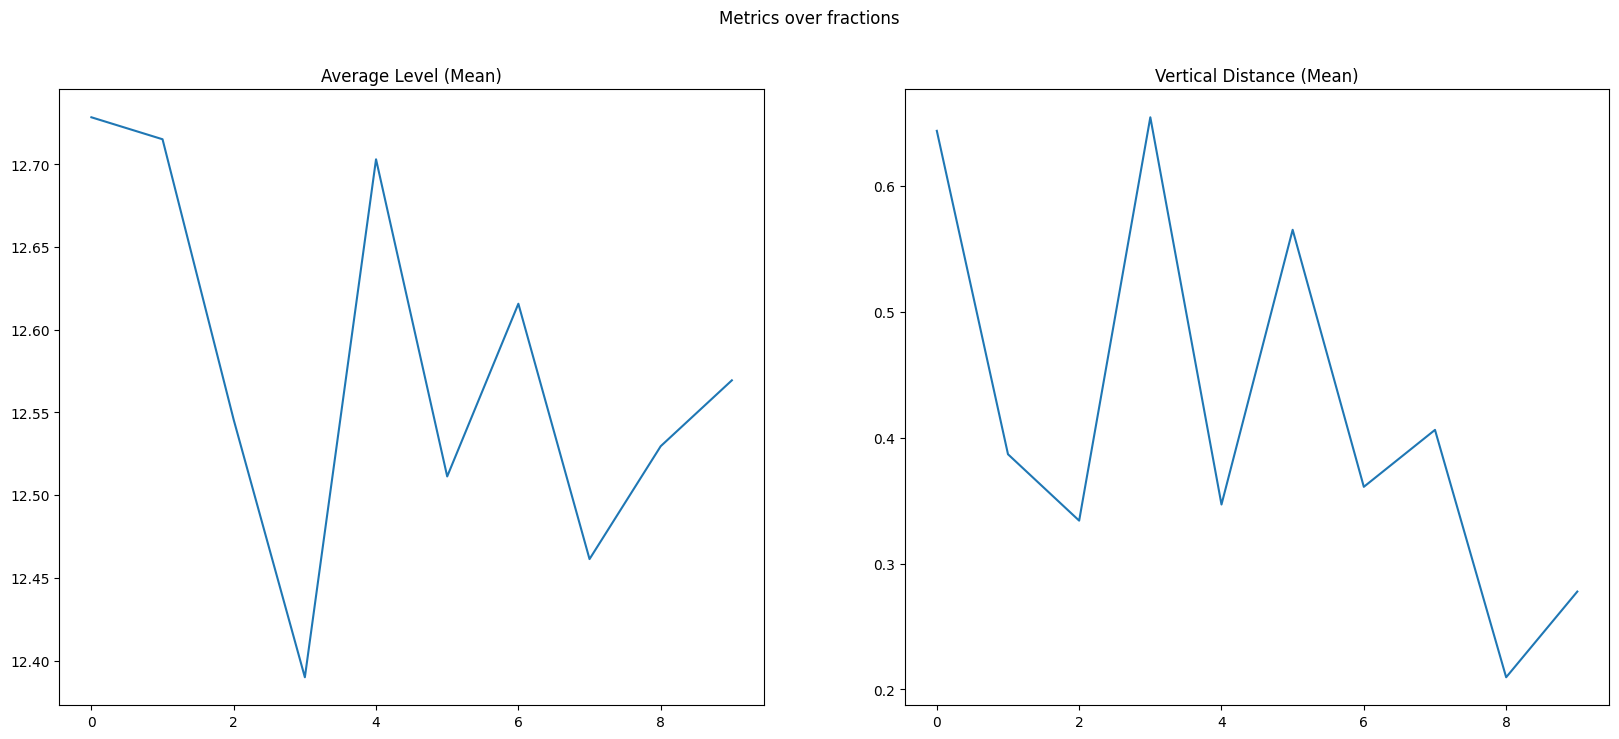

In [48]:
sample = data_list[0]
curr_data = os.path.join(curr_type_path, sample)
plot_by_fx(curr_data, "mu")